In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

In [70]:
import pandas_datareader as web
df=web.DataReader('BTC-USD', data_source='yahoo', start='2017-01-01', end='2021-03-04')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,1.477750e+08,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,2.221850e+08,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,1.851680e+08,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,3.449460e+08,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,5.101990e+08,1013.380005
...,...,...,...,...,...,...
2021-03-01,49784.015625,45115.093750,45159.503906,49631.242188,5.389130e+10,49631.242188
2021-03-02,50127.511719,47228.843750,49612.105469,48378.988281,4.753090e+10,48378.988281
2021-03-03,52535.136719,48274.320312,48415.816406,50538.242188,5.322081e+10,50538.242188


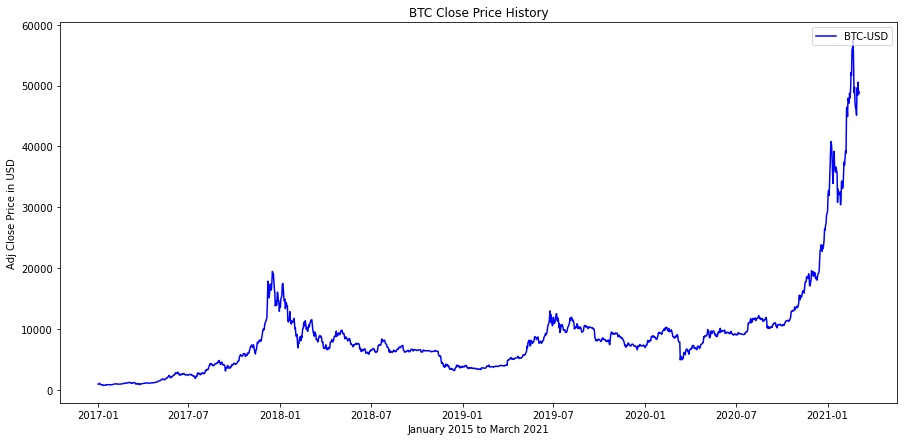

In [82]:
#Visualising the data
plt.figure(figsize=(15,7))
plt.plot(df['Adj Close'], label='BTC-USD', color='Blue')
plt.title('BTC Close Price History')
plt.xlabel('January 2015 to March 2021')
plt.ylabel('Adj Close Price in USD')
plt.legend(loc='upper right')
plt.show()

In [72]:
#creating simple moving average with a 30 day window
SMA30=pd.DataFrame()
SMA30['Adj Close Price']=df['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close Price
Date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN
...,...
2021-03-01,45977.865755
2021-03-02,46486.686719
2021-03-03,47053.388932


In [73]:
#creating long term average for 100 days
SMA100=pd.DataFrame()
SMA100['Adj Close Price']=df['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close Price
Date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN
...,...
2021-03-01,32678.469883
2021-03-02,32978.559746
2021-03-03,33300.300957


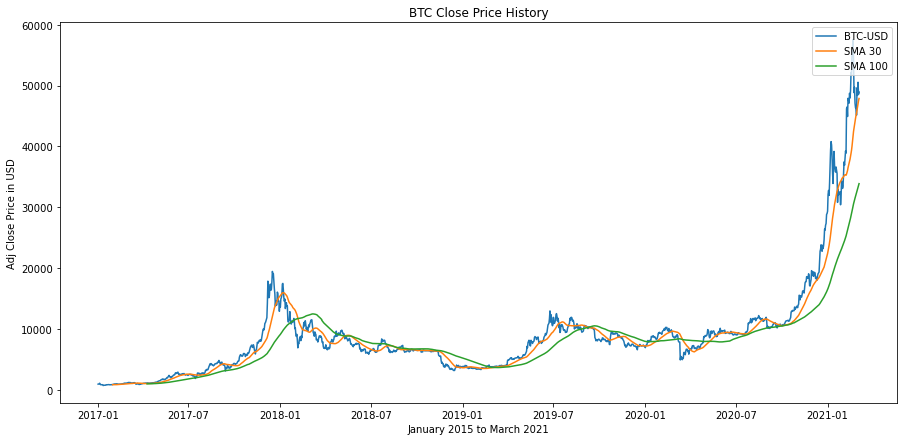

In [74]:
#visualising the datasets
plt.figure(figsize=(15,7))
plt.plot(df['Adj Close'], label='BTC-USD')
plt.plot(SMA30['Adj Close Price'], label='SMA 30')
plt.plot(SMA100['Adj Close Price'], label='SMA 100')
plt.title('BTC Close Price History')
plt.xlabel('January 2015 to March 2021')
plt.ylabel('Adj Close Price in USD')
plt.legend(loc='upper right')
plt.show()

In [75]:
#these strategies are telling us that when we should have bought and when we should sell
#when the sma30 crosses the sma100 thats when we should buy
#and when the sma100 crosses the sma 30 thats when we should sell


In [76]:
#we will predict this using python
df1=pd.DataFrame()
df1['BTC']= df['Adj Close']
df1['SMA30']=SMA30['Adj Close Price']
df1['SMA100']=SMA100['Adj Close Price']
df1

,BTC,SMA30,SMA100
Date,,,
2017-01-01,998.325012,NaN,NaN
2017-01-02,1021.750000,NaN,NaN
2017-01-03,1043.839966,NaN,NaN
2017-01-04,1154.729980,NaN,NaN
2017-01-05,1013.380005,NaN,NaN
...,...,...,...
2021-03-01,49631.242188,45977.865755,32678.469883
2021-03-02,48378.988281,46486.686719,32978.559746
2021-03-03,50538.242188,47053.388932,33300.300957


In [77]:
#Creating a function to signal when to buy and sell the stock
                    

In [78]:
def buy_sell(df1):
    Buy_Price=[]
    Sell_Price=[]
    flag=-1
    
    for i in range(len(df1)):
        if df1['SMA30'][i]>df1['SMA100'][i]:
            if flag!=1:
                Buy_Price.append(df1['BTC'][i])
                Sell_Price.append(np.nan)
                flag=1
            else:
                Buy_Price.append(np.nan)
                Sell_Price.append(np.nan)
        elif df1['SMA30'][i]<df1['SMA100'][i]:
            if flag!=0:
                Buy_Price.append(np.nan)
                Sell_Price.append(df1['BTC'][i])
                flag=0
            else:
                Buy_Price.append(np.nan)
                Sell_Price.append(np.nan)
        else:
            Buy_Price.append(np.nan)
            Sell_Price.append(np.nan)
            
    return(Buy_Price,Sell_Price) 


In [79]:
#storing the buying and selling data into a variable
buy_sell=buy_sell(df1)
df1['Buy_Price']=buy_sell[0]
df1['Sell_Price']=buy_sell[1]

In [80]:
df1

,BTC,SMA30,SMA100,Buy_Price,Sell_Price
Date,,,,,
2017-01-01,998.325012,NaN,NaN,NaN,NaN
2017-01-02,1021.750000,NaN,NaN,NaN,NaN
2017-01-03,1043.839966,NaN,NaN,NaN,NaN
2017-01-04,1154.729980,NaN,NaN,NaN,NaN
2017-01-05,1013.380005,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-03-01,49631.242188,45977.865755,32678.469883,NaN,NaN
2021-03-02,48378.988281,46486.686719,32978.559746,NaN,NaN
2021-03-03,50538.242188,47053.388932,33300.300957,NaN,NaN


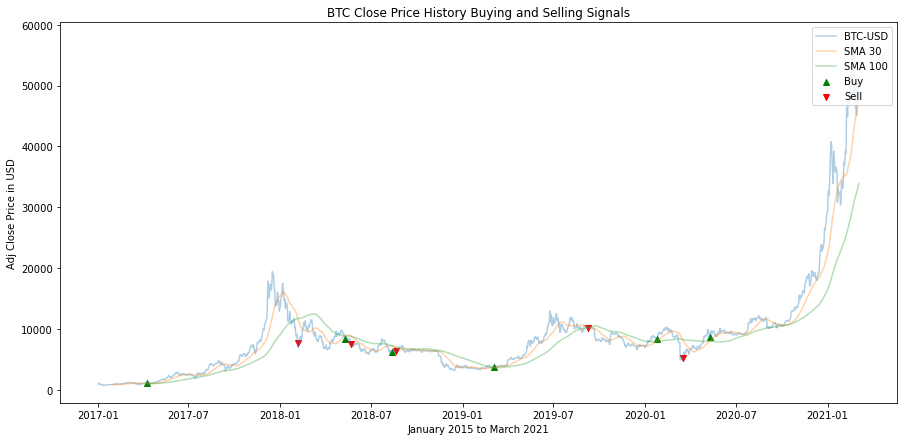

In [81]:
#visualising the strategy
plt.figure(figsize=(15,7))
plt.plot(df1['BTC'], label='BTC-USD', alpha=0.35)
plt.plot(df1['SMA30'], label='SMA 30', alpha=0.35)
plt.plot(df1['SMA100'], label='SMA 100', alpha=0.35)
plt.scatter(df1.index, df1['Buy_Price'], label='Buy', marker='^', color='Green')
plt.scatter(df1.index, df1['Sell_Price'], label='Sell', marker='v', color='Red')
plt.title('BTC Close Price History Buying and Selling Signals')
plt.xlabel('January 2015 to March 2021')
plt.ylabel('Adj Close Price in USD')
plt.legend(loc='upper right')
plt.show()